# 126. Word Ladder I
Link: https://leetcode.com/problems/word-ladder/

Given two words (beginWord and endWord), and a dictionary's word list, find the length of shortest transformation sequence from beginWord to endWord, such that:

1. Only one letter can be changed at a time
2. Each transformed word must exist in the word list.

For example,

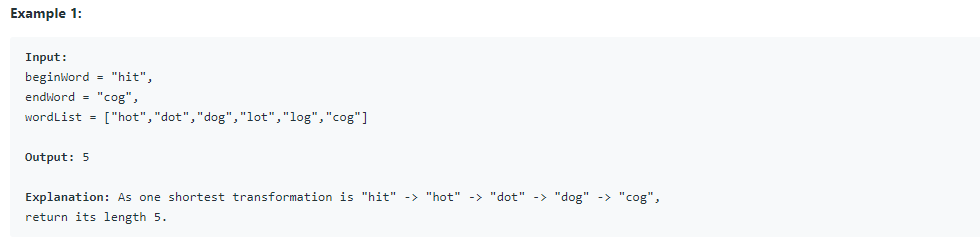`



**Note:**

:-Return 0 if there is no such transformation sequence.

:-All words have the same length.

:-All words contain only lowercase alphabetic characters.

:-You may assume no duplicates in the word list.

:-You may assume beginWord and endWord are non-empty and are not the same.

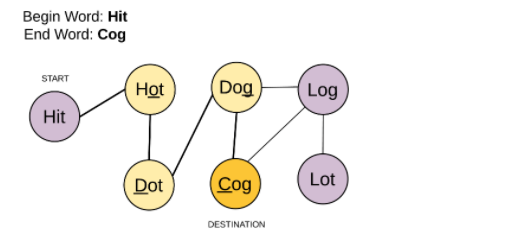

## Using BFS


In [1]:
from collections import defaultdict
class Solution(object):
    def ladderLength(self, beginWord, endWord, wordList):
        """
        :type beginWord: str
        :type endWord: str
        :type wordList: List[str]
        :rtype: int
        """

        if endWord not in wordList or not endWord or not beginWord or not wordList:
            return 0

        # Since all words are of same length.
        L = len(beginWord)

        # Dictionary to hold combination of words that can be formed,
        # from any given word. By changing one letter at a time.
        all_combo_dict = defaultdict(list)
        for word in wordList:
            for i in range(L):
                # Key is the generic word
                # Value is a list of words which have the same intermediate generic word.
                all_combo_dict[word[:i] + "*" + word[i+1:]].append(word)


        # Queue for BFS
        queue = collections.deque([(beginWord, 1)])
        # Visited to make sure we don't repeat processing same word.
        visited = {beginWord: True}
        while queue:
            current_word, level = queue.popleft()      
            for i in range(L):
                # Intermediate words for current word
                intermediate_word = current_word[:i] + "*" + current_word[i+1:]

                # Next states are all the words which share the same intermediate state.
                for word in all_combo_dict[intermediate_word]:
                    # If at any point if we find what we are looking for
                    # i.e. the end word - we can return with the answer.
                    if word == endWord:
                        return level + 1
                    # Otherwise, add it to the BFS Queue. Also mark it visited
                    if word not in visited:
                        visited[word] = True
                        queue.append((word, level + 1))
                all_combo_dict[intermediate_word] = []
        return 0

